In [1]:
import requests
import os
import pandas as pd
from bs4 import BeautifulSoup
from env import github_token, github_username
import acquire as aqr
import prepare as prep
import explore as exp
import json
import nltk

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jongarcia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Specify the file name where you want to save the list
file_name = "repo_processed.json"

# Load the REPOS list from the JSON file
with open(file_name, 'r') as file:
    repo_loaded = json.load(file)

In [3]:
repos_df = pd.DataFrame(repo_loaded)
repos_df

,repo,language,readme_contents
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth..."
1,kiloreux/awesome-robotics,None,Awesome Robotics\n================\n\n[![Aweso...
2,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C..."
3,mithi/robotics-coursework,None,# [🐳](https://mithi.github.io/deep-blueberry) ...
4,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...
...,...,...,...
672,CatchZeng/dingtalk,Go,# dingtalk\n\n![Go](https://github.com/CatchZe...
673,1c7/Translate-Subtitle-File,None,## 字幕组机翻小助手 - [视频演示](https://www.bilibili.com/...
674,landy22granatt/Kumpulan-Script-Termux,Python,pkg update && pkg upgrade\npkg install bash\np...
675,cirosantilli/china-dictatorship,HTML,"<style>\npre{ white-space:pre }\n#header,#cont..."


In [4]:
extra_words = []
exclude_words = []
repos_df = prep.process_dataframe(repos_df, extra_words, exclude_words)

In [5]:
repos_df['readme'] = repos_df['lemmatized']

In [6]:
repos_df = repos_df.drop(columns=['original', 'clean', 'remove_stopwords', 'stemmed', 'lemmatized'])

In [7]:
repos_df[:50]

,repo,language,readme
0,AtsushiSakai/PythonRobotics,Python,img srchttpsgithubcomatsushisakaipythonrobotic...
1,kiloreux/awesome-robotics,None,awesome robotics awesomehttpscdnrawgitcomsindr...
2,NxRLab/ModernRobotics,Python,modern robotics mechanic planning control code...
3,mithi/robotics-coursework,None,httpsmithigithubiodeepblueberry httpskoficommi...
4,onlytailei/CppRobotics,C++,cpprobotics cpp implementation pythonroboticsh...
5,JdeRobot/RoboticsAcademy,JavaScript,hrefhttpsjderobotgithubioimg srcimglogogif wid...
6,pptacher/probabilistic_robotics,C++,probabilisticrobotics working detailed solutio...
7,jslee02/awesome-robotics-libraries,None,awesome robotics library curated list robotics...
8,petercorke/robotics-toolbox-python,Python,robotics toolbox python python robotics packag...
9,Unity-Technologies/Unity-Robotics-Hub,C#,p aligncenterimg srcimageswarehousegifp unity ...


In [8]:
# Remove rows where 'language' is None
repos_df = repos_df[repos_df['language'].notna()]

In [9]:
repos_df[repos_df['language'].isna()]

,repo,language,readme


In [10]:
# Remove repos without a readme
repos_df = repos_df[repos_df['readme'] != 'failtoloadreadme']

In [100]:
# Define a modified categorization function
def categorize_language(language, acceptable_languages):
    if language in acceptable_languages:
        return language
    else:
        return 'Other'

# Define the list of acceptable languages
acceptable_languages = ['C++', 'Python']

# Apply the categorize_language function with the acceptable_languages list
repos_df['language'] = repos_df['language'].apply(categorize_language, args=(acceptable_languages,))


In [12]:
counts = exp.show_counts_and_ratios(repos_df, "language")
counts

,n,percent
language,,
C++,207,0.338789
Python,201,0.328969
JavaScript,35,0.057283
C,19,0.031097
Jupyter Notebook,19,0.031097
TypeScript,14,0.022913
Java,14,0.022913
HTML,12,0.019640
Go,12,0.019640


In [91]:
type(repos_df)

pandas.core.frame.DataFrame

In [102]:
# Join all the text from the DataFrame where the label is 'ham'
C_repos = ' '.join(repos_df[repos_df.language == 'C++'].readme)

# Join all the text from the DataFrame where the label is 'spam'
Python_repos = ' '.join(repos_df[repos_df.language == 'Python'].readme)

# Join all the text from the DataFrame where the label is 'spam'
other_repos = ' '.join(repos_df[repos_df.language == 'Other'].readme)

# Join all the text from the DataFrame
all_repos = ' '.join(repos_df.readme)


In [109]:
# After lemmatizing the readme, you need to split the words for frequency counting
c_words = repos_df[repos_df.language == 'C++'].readme.str.split(expand=True).stack()
python_words = repos_df[repos_df.language == 'Python'].readme.str.split(expand=True).stack()
other_words = repos_df[repos_df.language == 'Other'].readme.str.split(expand=True).stack()
all_words = repos_df.readme.str.split(expand=True).stack()

In [110]:
c_words

4    0                                             cpprobotics
     1                                                     cpp
     2                                          implementation
     3       pythonroboticshttpsgithubcomatsushisakaipython...
     4                                              requirment
                                   ...                        
663  1097                                            community
     1098                                              keeping
     1099                                            knowledge
     1100                                                  nap
     1101                                            framework
Length: 125343, dtype: object

In [111]:
c_freq = pd.Series(c_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

c_freq.head()

'        1350
build    1241
robot     932
&#9;      919
ro        676
Name: count, dtype: int64

In [112]:
word_counts = (pd.concat([all_freq, c_freq, python_freq, other_freq], axis=1, sort=True)
                .set_axis(['all', 'C++', 'Python', 'Other'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,C++,Python,Other
&#9;,2267,919,1057,291
',5130,1350,1814,1966
0,776,272,304,200
00,110,89,19,2
000,16,0,2,14


In [113]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,C++,Python,Other
',5130,1350,1814,1966
robot,3192,932,1105,1155
&#9;,2267,919,1057,291
ro,2004,676,216,1112
using,1971,605,870,496
use,1907,629,628,650
install,1844,655,797,392
build,1803,1241,197,365
run,1548,522,592,434
img,1487,401,670,416


In [ ]:
pd.concat([word_counts[word_counts.spam == 0].sort_values(by='ham').tail(6),
           word_counts[word_counts.ham == 0].sort_values(by='spam').tail(6)])


In [123]:
# Select the top 6 rows where 'C++' column is 0 and sort by 'Python' column
cpp_zero_py = word_counts[word_counts['C++'] == 0].sort_values(by='Python').tail(6)

# Select the top 6 rows where 'Python' column is 0 and sort by 'C++' column
python_zero_cpp = word_counts[word_counts['Python'] == 0].sort_values(by='C++').tail(6)


# Select the top 6 rows where 'C++' column is 0 and sort by 'Python' column
cpp_zero_other = word_counts[word_counts['C++'] == 0].sort_values(by='Other').tail(6)

# Select the top 6 rows where 'Other' column is 0 and sort by 'C++' column
other_zero_cpp = word_counts[word_counts['Other'] == 0].sort_values(by='C++').tail(6)


# Select the top 6 rows where 'Python' column is 0 and sort by 'C++' column
python_zero_other = word_counts[word_counts['Python'] == 0].sort_values(by='Other').tail(6)

# Select the top 6 rows where 'Other' column is 0 and sort by 'C++' column
other_zero_py = word_counts[word_counts['Other'] == 0].sort_values(by='Python').tail(6)


# Concatenate the three DataFrames
cpp_vs_py = pd.concat([cpp_zero_py, python_zero_cpp, ])#, python_zero_cpp, python_zero_other, other_zero_py, other_zero_cpp])

cpp_vs_other = pd.concat([cpp_zero_other, other_zero_cpp, ])

py_vs_other = pd.concat([python_zero_other, other_zero_py, ])

print(cpp_vs_py)
print('\n')
print(cpp_vs_other)
print('\n')
print(py_vs_other)


                all  C++  Python  Other
selfsupervised   90    0      89      1
valigntop       132    0     130      2
width1428a      130    0     130      0
grasping        180    0     145     35
bicubic         160    0     160      0
radiance        282    0     281      1
pump             46   46       0      0
symforce         49   49       0      0
pinocchio        50   50       0      0
ruckig           52   52       0      0
eigen            65   64       0      1
simbody         102  102       0      0


                all  C++  Python  Other
targetblankrua   98    0       0     98
npm             137    0       6    131
altname         142    0       0    142
width20px       147    0       0    147
aligntop        147    0       0    147
hiring          177    0       0    177
symforce         49   49       0      0
pinocchio        50   50       0      0
ruckig           52   52       0      0
elevation        77   62      15      0
simbody         102  102       0      

In [124]:
import matplotlib.pyplot as plt

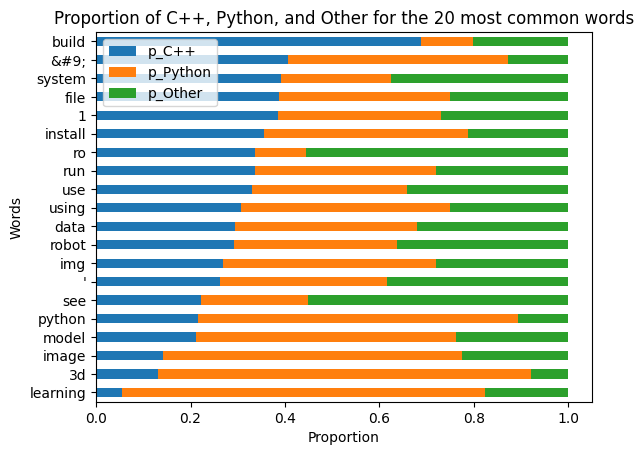

In [125]:
# Calculate the proportions of 'C++', 'Python', and 'Other'
word_counts['p_C++'] = word_counts['C++'] / word_counts['all']
word_counts['p_Python'] = word_counts['Python'] / word_counts['all']
word_counts['p_Other'] = word_counts['Other'] / word_counts['all']


# Select the top 20 rows by 'all' column
top_20_words = word_counts.sort_values(by='all').tail(20)

# Sort the DataFrame by 'p_C++' column
top_20_words = top_20_words.sort_values(by='p_C++')

# Create a stacked bar chart
ax = top_20_words[['p_C++', 'p_Python', 'p_Other']].plot.barh(stacked=True)

# Set plot title and labels
plt.title('Proportion of C++, Python, and Other for the 20 most common words')
plt.xlabel('Proportion')
plt.ylabel('Words')

# Show the plot
plt.show()




In [139]:
# Filter rows where 'C++', 'Python', and 'Other' are greater than 10
filtered_rows = word_counts[(word_counts['C++'] > 10) & (word_counts['Python'] > 10) & (word_counts['Other'] > 10)]

# Calculate the 'ratio' column as a percentage and round to the nearest whole number
filtered_rows.loc[:, 'p_C++'] = ((filtered_rows['C++'] / (filtered_rows['C++'] + filtered_rows['Python'] + filtered_rows['Other'])) * 100).round()
filtered_rows.loc[:, 'p_Python'] = ((filtered_rows['Python'] / (filtered_rows['C++'] + filtered_rows['Python'] + filtered_rows['Other'])) * 100).round()
filtered_rows.loc[:, 'p_Other'] = ((filtered_rows['Other'] / (filtered_rows['C++'] + filtered_rows['Python'] + filtered_rows['Other'])) * 100).round()

# Sort the DataFrame by 'ratio' column
sorted_df = filtered_rows.sort_values(by='p_C++', ascending= False)

# Select the top and bottom rows using the pipe method
result = sorted_df.pipe(lambda df: pd.concat([df.head(), df.tail()]))

# Display the result
result

,all,C++,Python,Other,p_C++,p_Python,p_Other
cmake,369,323,24,22,88.0,7.0,6.0
panel,95,68,14,13,72.0,15.0,14.0
frame,345,247,67,31,72.0,19.0,9.0
imu,176,125,11,40,71.0,6.0,23.0
build,1803,1241,197,365,69.0,11.0,20.0
industrial,176,11,21,144,6.0,12.0,82.0
deep,444,26,327,91,6.0,74.0,20.0
training,577,29,433,115,5.0,75.0,20.0
train,267,11,198,58,4.0,74.0,22.0
neural,534,18,483,33,3.0,90.0,6.0


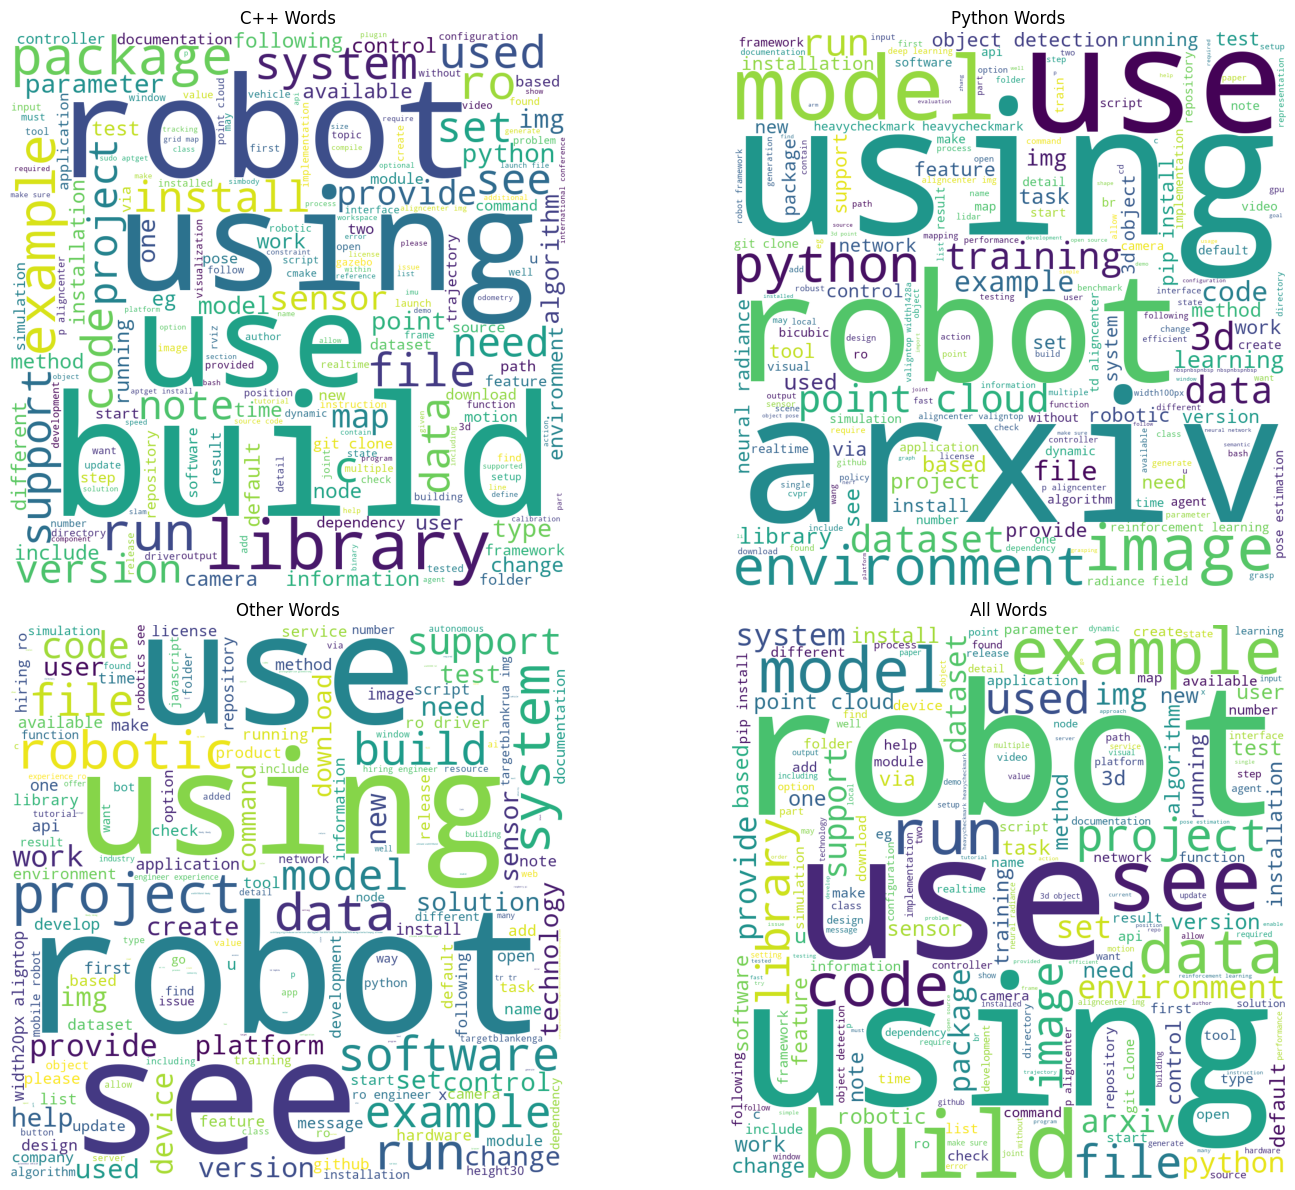

In [148]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each set of words
c_cloud = WordCloud(background_color='white', height=1000, width=1000).generate(' '.join(c_words))
python_cloud = WordCloud(background_color='white', height=1000, width=1000).generate(' '.join(python_words))
other_cloud = WordCloud(background_color='white', height=1000, width=1000).generate(' '.join(other_words))
all_cloud = WordCloud(background_color='white', height=1000, width=1000).generate(' '.join(all_words))

# Create subplots for each word cloud
plt.figure(figsize=(16, 12))

# Subplot for C++
plt.subplot(2, 2, 1)
plt.imshow(c_cloud)
plt.title('C++ Words')
plt.axis('off')

# Subplot for Python
plt.subplot(2, 2, 2)
plt.imshow(python_cloud)
plt.title('Python Words')
plt.axis('off')

# Subplot for Other
plt.subplot(2, 2, 3)
plt.imshow(other_cloud)
plt.title('Other Words')
plt.axis('off')

# Subplot for All Words
plt.subplot(2, 2, 4)
plt.imshow(all_cloud)
plt.title('All Words')
plt.axis('off')

plt.tight_layout()
plt.show()


In [153]:
top_20_cpp_bigrams = (pd.Series(nltk.ngrams(c_words, 2))
                      .value_counts()
                      .head(20))

top_20_cpp_bigrams.head()


top_20_py_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_py_bigrams.head()



top_20_other_bigrams = (pd.Series(nltk.ngrams(other_words, 2))
                      .value_counts()
                      .head(20))

top_20_cpp_bigrams.head(), top_20_py_bigrams.head(), top_20_other_bigrams.head()



((&#9;, &#9;)        504
 (git, clone)        138
 (point, cloud)       97
 (p, aligncenter)     95
 (0, 0)               87
 Name: count, dtype: int64,
 (&#9;, &#9;)           450
 (point, cloud)         374
 (object, detection)    256
 (pip, install)         243
 (neural, radiance)     221
 Name: count, dtype: int64,
 (', ')                   153
 (width20px, aligntop)    147
 (ro, 2)                  127
 (ro, driver)             117
 (hiring, ro)             100
 Name: count, dtype: int64)